# 데이터 과학

> "작성 중"

- toc: true
- branch: master
- badges: true
- comments: true
- author: 한재수
- categories: [python, statistics]

`-` 2학기에 듣는 빅데이터 개론 수업 내용 실습하고 간단히 정리

# 데이터의 이해 $\to$ 요약통계량

`-` 통계학은 데이터를 수집하고 분석하여 결론을 도출하는 학문 ---> 데이터는 통계적 조사의 근간

## 데이터 기초
`-` 효율적으로 자료를 구성하고 기술하는 것은 대부분의 자료분석에서 첫번째 단계로 자료를 구성하는 가장 좋은 방법은 data matrix를 사용하는 것

In [16]:
import pandas as pd
county = pd.read_csv("C:/Users/한재수/big-data_introduction/county.csv", header = 0) # csv 파일 불러오기 ## 미국의 3142 counties에 대한 데이터

In [2]:
county.shape # 데이터의 row, column 수 확인

(3142, 15)

In [3]:
county.head(6) # 데이터의 상위 6개의 행 출력

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial
3,Bibb County,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none
4,Blount County,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none
5,Bullock County,Alabama,11714.0,10914,10309.0,-2.28,28.5,76.9,9.9,4.93,no,hs_diploma,15444.16,29655.0,none


`-` case (observational unit) : data matrix의 행
    
`-` variable : data matrix의 열과 case의 특성을 나타냄

In [4]:
county.info() # 데이터 county의 요약정보 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               3142 non-null   object 
 1   state              3142 non-null   object 
 2   pop2000            3139 non-null   float64
 3   pop2010            3142 non-null   int64  
 4   pop2017            3139 non-null   float64
 5   pop_change         3139 non-null   float64
 6   poverty            3140 non-null   float64
 7   homeownership      3142 non-null   float64
 8   multi_unit         3142 non-null   float64
 9   unemployment_rate  3139 non-null   float64
 10  metro              3139 non-null   object 
 11  median_edu         3140 non-null   object 
 12  per_capita_income  3140 non-null   float64
 13  median_hh_income   3140 non-null   float64
 14  smoking_ban        2562 non-null   object 
dtypes: float64(9), int64(1), object(5)
memory usage: 368.3+ KB


`-` 결측치가 존재하면 function이 제대로 작동하지 않을 수 있음(ex 평균과 중앙값 등) ---> 결측치를 처리해줘야 함

In [7]:
county.describe().round(2) # 데이터 county의 각 양적변수에 대해서만 요약통계량 출력

,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,per_capita_income,median_hh_income
count,3139.00,3142.00,3139.00,3139.00,3140.00,3142.00,3142.00,3139.00,3140.00,3140.00
mean,89649.99,98262.04,103763.41,0.53,15.97,73.27,12.32,4.61,26093.12,49765.39
std,292547.67,312946.70,333194.52,4.08,6.52,7.83,9.29,1.65,6280.30,13150.64
min,67.00,82.00,88.00,-33.63,2.40,0.00,0.00,1.62,10466.84,19264.00
25%,11223.50,11114.50,10975.50,-1.97,11.30,69.50,6.10,3.52,21771.82,41126.00
50%,24621.00,25872.00,25857.00,-0.06,15.20,74.60,9.70,4.36,25445.28,48072.50
75%,61775.00,66780.00,67756.00,2.38,19.40,78.40,15.90,5.36,29275.65,55771.25
max,9519338.00,9818605.00,10163507.00,37.19,52.00,91.30,98.50,19.07,69532.86,129588.00


## 변수의 종류 

### 수치형(numerical) 변수

`-` 연속형(continuous) 변수: 측정 대성의 특성이 연속형으로 되어 있는 자료 ex) 키
    
`-` 이산형(discrete) 변수: 측정 대상의 값이 양적으로 비교할 수 있고 등간격으로 측정 가능한 자료 ex) 가족의 수 ---> 데이터 수가 많은 경우 연속형으로 취급하고 분석해도 된다

### 범주형(categorical) 변수

`-` 명목형(nominal) 변수: 측정 대상을 고유한 특성에 따라 분류하여 표시한 자료 ---> 그 값은 단순히 특성을 나타내는 값 ex) 기초통계학 과목의 재수강 여부
    
`-` 순서형(ordinal) 변수: 측정 대상의 특성이 크기를 비교할 수 있는 범주로 이루어진 자료 ex) 연령대

## 변수들 사이의 관계

`-` 변수들 사이에 관계가 있을 때 연관(associate) 혹은 종속(dependent) 관계가 있다고 한다

`-` 두 변수가 수치형 변수일 때 그 관계는 양의 연관(positive assoicate) 혹은 음의 연관(negative associate)으로 나타난다

`-` 예측에 도움을 주는 변수를 설명변수(explanatory variable)라고 부르고 다른 변수는 반응변수(response variable)라고 부른다

### iris data 

In [2]:
iris = pd.read_csv("C:/Users/한재수/big-data_introduction/iris.csv", header = 0) # csv 파일 불러오기 

In [9]:
iris.shape

(150, 5)

`-` iris data에서 case는 150개

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


`-` Dtype을 통해 변수가 수치형인지 범주형 변수인지 확인이 가능함

In [7]:
iris.describe().round(2) # 데이터 county의 각 양적변수에 대해서만 요약통계량 출력

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


`-` `unique` 함수를 사용하여 변수가 가지는 unique한 값의 개수를 구할 수 있음

In [24]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

`-` iris데이터에서 species 변수가 가지는 범주의 개수는 3개임 ---> 엄청 많아도 일일이 셀거야?? ---> size 함수를 사용하여 array에 있는 요소의 개수를 세자

In [23]:
iris['species'].unique().size

3

`-` iris데이터에서 species 변수가 가지는 범주의 개수는 3개임

## 수치형 자료의 요약
`-` 자료의 중심위치를 나타내는 측도

`-` 자료가 각 중심위치의 값으로부터 얼마나 흩어져 있는가를 나타내는 퍼진 정도의 측도를 다룸 

### 중심위치의 측도 

In [2]:
import numpy as np
import scipy.stats

In [20]:
np.mean(county['homeownership']).round(2) # 평균

73.27

In [10]:
np.nanmedian(county['per_capita_income']) # 결측치를 제외한 중앙값

25445.275

In [11]:
scipy.stats.mode(county['state']) # 최빈값

ModeResult(mode=array(['Texas'], dtype=object), count=array([254]))

> Note: 중심위치의 측도로서 최빈값은 하나의 봉이 있는 자료에서 유용함

In [6]:
import matplotlib.pyplot as plt

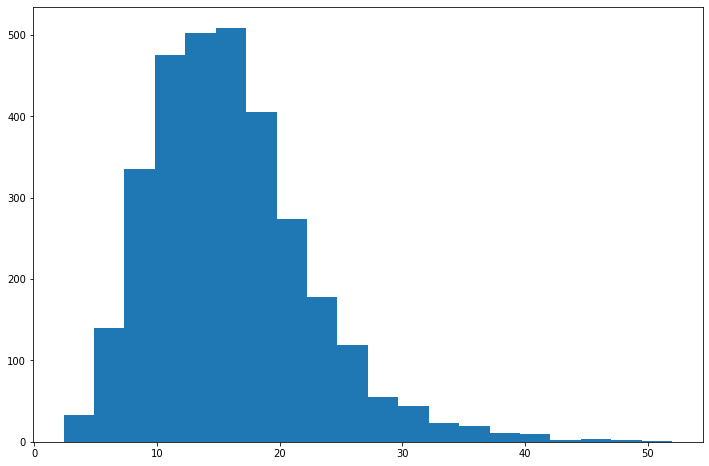

In [17]:
plt.figure(figsize = (12,8))
plt.hist(county['poverty'], histtype = 'bar', bins = 20) # rwidth = 0.9는 히스토그램 막대기 사이 간격을 의미함
plt.show()

### 퍼진 정도의 측도

In [18]:
np.var(county['median_hh_income']).round(2) # 분산

172884215.88

In [19]:
np.std(county['median_hh_income']).round(2) # 표준편차 (=np.sqrt(np.var(county['unemployment_rate'])))

13148.54

In [16]:
max(county['median_hh_income']) - min(county['median_hh_income']) # 범위(= 최댓값-최솟값)

110324.0

### 백분위수와 사분위수 

In [21]:
county['per_capita_income'].quantile(q = 0.05) 

17752.7005

In [22]:
county['per_capita_income'].quantile([0,0.25,0.5,0.75,1]) # 최솟값, 제1사분위수, 제2사분위수, 제3사분위수, 최댓값

0.00    10466.840
0.25    21771.825
0.50    25445.275
0.75    29275.650
1.00    69532.860
Name: per_capita_income, dtype: float64

In [23]:
county['per_capita_income'].describe()   # Pandas의 describe method를 이용하여 최대, 최소, 사분위수 및 간단한 요약통계량을 출력할 수 있음

count     3140.000000
mean     26093.122309
std       6280.300268
min      10466.840000
25%      21771.825000
50%      25445.275000
75%      29275.650000
max      69532.860000
Name: per_capita_income, dtype: float64

### 사분위수범위

In [25]:
(county['per_capita_income'].quantile(q = 0.75) - county['per_capita_income'].quantile(q = 0.25)).round(2)

7503.83

### 변동계수 
`-` 변동계수(coefficient of variation)는 상대적으로 퍼진 정도를 나타냄

`-` 단위가 다르거나 중심위치가 매우 다른 자료를 비교할 때 사용됨

{% raw %}
`-` $CV = \frac{s}{\bar{x}}\times 100$
{% endraw %}

### 상관계수

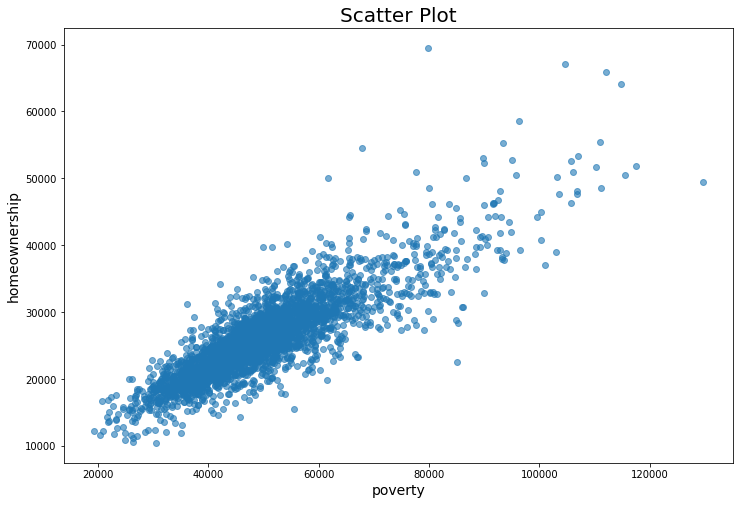

In [10]:
plt.figure(figsize = (12,8))
plt.plot('median_hh_income', 'per_capita_income', data = county, linestyle = 'none', marker = 'o', alpha = 0.6)
plt.title('Scatter Plot', fontsize = 20)
plt.xlabel('poverty', fontsize = 14)
plt.ylabel('homeownership', fontsize = 14)
plt.show()   

In [28]:
ds = county.loc[:, ['median_hh_income', 'per_capita_income']]
ds.corr(method = 'pearson')

,median_hh_income,per_capita_income
median_hh_income,1.00000,0.86183
per_capita_income,0.86183,1.00000


In [31]:
(county['median_hh_income'].corr(county['per_capita_income'])).round(2)

0.86

## 범주형 자료의 요약
`-` 범주형 자료에서는 각 범주가 나타나는 횟수를 요약함으로써 범주형 자료의 개요를 파악할 수 있음

### 도수분포표 

`-` 범주형 자료의 경우에 각 관측값은 몇 개의 범주 중의 하나의 값을 갖게 됨

`-` 이 때 각 범주에 속하는 관측값의 개수 ---> 도수(frequency)

`-` 이 도수를 자료의 전체 개수로 나눈 비율 ---> 상대도수(relative frequency)

`-` 이를 표로 요약한 것 ---> 도수분포표(frequency table)

In [3]:
import numpy as np

np.unique(county['state'], return_counts = True) # return_counts = True로 하면 아래와 같은 array(도수)가 출력됨

(array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
        'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
        'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
        'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
        'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
        'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
        'New Jersey', 'New Mexico', 'New York', 'North Carolina',
        'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
        'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
        'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
        'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object),
 array([ 67,  29,  15,  75,  58,  64,   8,   3,   1,  67, 159,   5,  44,
        102,  92,  99, 105, 120,  64,  16,  24,  14,  83,  87,  82, 115,
         56,  93,  17,  10,  21,  33,  62, 100,  53,  88,  77,  36,  67,
          5,  46,  66,  95, 254

In [7]:
ft = county['state'].value_counts() # 유일한 값별 개수를 세준다 # sort = True, ascending = True 옵션을 통해 내립차순 또는 오름차순으로 정렬 가능함
rft = county['state'].value_counts() / len(county['state']) # relative frequency

In [9]:
pd.DataFrame({'Freq': ft, 'Relative freq': rft}) # 딕셔너리를 통해 dataframe 생성

,Freq,Relative freq
Texas,254,0.080840
Georgia,159,0.050605
Virginia,133,0.042330
Kentucky,120,0.038192
Missouri,115,0.036601
Kansas,105,0.033418
Illinois,102,0.032463
North Carolina,100,0.031827
Iowa,99,0.031509
Tennessee,95,0.030236


### 분할표 

`-` 두 변수가 모두 범주형이면 도수분포표를 2차원을 확장 ---> 분할표(contingency table)

In [17]:
mlb = pd.read_csv("C:/Users/한재수/big-data_introduction/mlb.csv", header = 0) # 2010년도 828명의 메이저 리그 선수들에 대한 연봉데이터
mlb.head(6)

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0
5,Chad Qualls,Arizona Diamondbacks,Pitcher,4185.0


In [18]:
mlbtb = pd.crosstab(mlb['team'], mlb['position'])
mlbtb

position,Catcher,Designated Hitter,First Baseman,Infielder,Outfielder,Pitcher,Second Baseman,Shortstop,Third Baseman
team,,,,,,,,,
Arizona Diamondbacks,2,0,2,0,3,13,1,3,2
Atlanta Braves,2,0,2,0,5,12,2,3,1
Baltimore Orioles,2,0,1,0,5,13,1,2,2
Boston Red Sox,2,1,1,0,4,15,1,2,3
Chicago Cubs,2,0,1,0,5,14,2,1,2
Chicago White Sox,3,1,1,0,5,12,3,1,0
Cincinnati Reds,2,0,1,0,6,11,2,2,2
Cleveland Indians,2,1,2,1,5,15,1,1,1
Colorado Rockies,2,0,2,0,5,15,1,1,2


In [19]:
mlbtb.sum(axis = 1)   # 행의 합

team
Arizona Diamondbacks     26
Atlanta Braves           27
Baltimore Orioles        26
Boston Red Sox           29
Chicago Cubs             27
Chicago White Sox        26
Cincinnati Reds          26
Cleveland Indians        29
Colorado Rockies         28
Detroit Tigers           27
Florida Marlins          27
Houston Astros           28
Kansas City Royals       27
Los Angeles Angeles      29
Los Angeles Dodgers      27
Milwaukee Brewers        29
Minnesota Twins          28
New York Mets            28
New York Yankees         25
Oakland Athletics        31
Philadelphia Phillies    28
Pittsburgh Pirates       27
San Diego Padres         26
San Francisco Giants     28
Seattle Mariners         28
St. Louis Cardinals      25
Tampa Bay Rays           27
Texas Rangers            29
Toronto Blue Jays        30
Washington Nationals     30
dtype: int64

In [20]:
mlbtb.sum(axis = 0) # 열의 합

position
Catcher               67
Designated Hitter      7
First Baseman         42
Infielder              4
Outfielder           148
Pitcher              410
Second Baseman        48
Shortstop             56
Third Baseman         46
dtype: int64

In [31]:
#collapse-output
mlbtb.sum?

Signature:
mlbtb.sum(
    axis=None,
    skipna=None,
    level=None,
    numeric_only=None,
    min_count=0,
    **kwargs,
)
Docstring:
Return the sum of the values over the requested axis.

This is equivalent to the method ``numpy.sum``.

Parameters
----------
axis : {index (0), columns (1)}
    Axis for the function to be applied on.
skipna : bool, default True
    Exclude NA/null values when computing the result.
level : int or level name, default None
    If the axis is a MultiIndex (hierarchical), count along a
    particular level, collapsing into a Series.
numeric_only : bool, default None
    Include only float, int, boolean columns. If None, will attempt to use
    everything, then use only numeric data. Not implemented for Series.
min_count : int, default 0
    The required number of valid values to perform the operation. If fewer than
    ``min_count`` non-NA values are present the result will be NA.
**kwargs
    Additional keyword arguments to be passed to the function.

R

`-` 분할표에 margin(행과 열의 합)을 붙여 출력하는 것도 가능

In [32]:
mlbtb_m = pd.crosstab(mlb['team'], mlb['position'], margins = True)
mlbtb_m

position,Catcher,Designated Hitter,First Baseman,Infielder,Outfielder,Pitcher,Second Baseman,Shortstop,Third Baseman,All
team,,,,,,,,,,
Arizona Diamondbacks,2,0,2,0,3,13,1,3,2,26
Atlanta Braves,2,0,2,0,5,12,2,3,1,27
Baltimore Orioles,2,0,1,0,5,13,1,2,2,26
Boston Red Sox,2,1,1,0,4,15,1,2,3,29
Chicago Cubs,2,0,1,0,5,14,2,1,2,27
Chicago White Sox,3,1,1,0,5,12,3,1,0,26
Cincinnati Reds,2,0,1,0,6,11,2,2,2,26
Cleveland Indians,2,1,2,1,5,15,1,1,1,29
Colorado Rockies,2,0,2,0,5,15,1,1,2,28


In [33]:
#collapse-output
pd.crosstab?

Signature:
pd.crosstab(
    index,
    columns,
    values=None,
    rownames=None,
    colnames=None,
    aggfunc=None,
    margins=False,
    margins_name: str = 'All',
    dropna: bool = True,
    normalize=False,
) -> 'DataFrame'
Docstring:
Compute a simple cross tabulation of two (or more) factors. By default
computes a frequency table of the factors unless an array of values and an
aggregation function are passed.

Parameters
----------
index : array-like, Series, or list of arrays/Series
    Values to group by in the rows.
columns : array-like, Series, or list of arrays/Series
    Values to group by in the columns.
values : array-like, optional
    Array of values to aggregate according to the factors.
    Requires `aggfunc` be specified.
rownames : sequence, default None
    If passed, must match number of row arrays passed.
colnames : sequence, default None
    If passed, must match number of column arrays passed.
aggfunc : function, optional
    If specified, requires `values

In [34]:
mlbtb_m.shape # 분할표의 차원

(31, 10)

In [36]:
mlbtb_m.iloc[0:mlbtb_m.shape[0]-1, mlbtb_m.shape[1]-1]  # 위와 같은 결과(행의 합)

team
Arizona Diamondbacks     26
Atlanta Braves           27
Baltimore Orioles        26
Boston Red Sox           29
Chicago Cubs             27
Chicago White Sox        26
Cincinnati Reds          26
Cleveland Indians        29
Colorado Rockies         28
Detroit Tigers           27
Florida Marlins          27
Houston Astros           28
Kansas City Royals       27
Los Angeles Angeles      29
Los Angeles Dodgers      27
Milwaukee Brewers        29
Minnesota Twins          28
New York Mets            28
New York Yankees         25
Oakland Athletics        31
Philadelphia Phillies    28
Pittsburgh Pirates       27
San Diego Padres         26
San Francisco Giants     28
Seattle Mariners         28
St. Louis Cardinals      25
Tampa Bay Rays           27
Texas Rangers            29
Toronto Blue Jays        30
Washington Nationals     30
Name: All, dtype: int64

In [37]:
mlbtb_m.iloc[mlbtb_m.shape[0]-1, 0:mlbtb_m.shape[1]-1]  # 위와 같은 결과(열의 합)

position
Catcher               67
Designated Hitter      7
First Baseman         42
Infielder              4
Outfielder           148
Pitcher              410
Second Baseman        48
Shortstop             56
Third Baseman         46
Name: All, dtype: int64